## Credit Card Defaulters Prediction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

sns.set_theme()

warnings.filterwarnings('ignore')

### Data loading

In [2]:
df = pd.read_excel('data.xls')
df = df.sample(n=2000,replace =False, random_state=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10747,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12573,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29676,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8856,8857,80000,2,3,1,52,2,2,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21098,21099,270000,1,1,2,34,1,2,0,0,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


### Dataset attributes

### Summary statistics

In [4]:
df.shape

(2000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2000 non-null   int64
 1   LIMIT_BAL                   2000 non-null   int64
 2   SEX                         2000 non-null   int64
 3   EDUCATION                   2000 non-null   int64
 4   MARRIAGE                    2000 non-null   int64
 5   AGE                         2000 non-null   int64
 6   PAY_0                       2000 non-null   int64
 7   PAY_2                       2000 non-null   int64
 8   PAY_3                       2000 non-null   int64
 9   PAY_4                       2000 non-null   int64
 10  PAY_5                       2000 non-null   int64
 11  PAY_6                       2000 non-null   int64
 12  BILL_AMT1                   2000 non-null   int64
 13  BILL_AMT2                   2000 non-null   int64
 14  BIL

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,14950.749000,171825.000000,1.603000,1.853000,1.555000,35.458000,-0.024500,-0.138500,-0.179500,-0.213000,...,44390.095500,41502.586000,39643.917000,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500,0.219500
std,8624.251173,131598.930521,0.489398,0.798567,0.516825,9.144892,1.103861,1.163613,1.177698,1.166753,...,65827.281839,61928.132672,60472.016246,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739,0.414011
min,3.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7404.000000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2939.500000,2158.750000,1319.250000,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000,0.000000
50%,14889.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19454.000000,18652.000000,17621.500000,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000,0.000000
75%,22510.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,53394.250000,51005.500000,49484.750000,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,71.000000,6.000000,5.000000,8.000000,7.000000,...,487066.000000,489200.000000,513798.000000,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000,1.000000


### Data Transformation

In [7]:
df.index = df['ID']
del df['ID']

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [9]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
df['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

In [11]:
df['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

In [12]:
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [13]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

### Data Visualization and Analysis

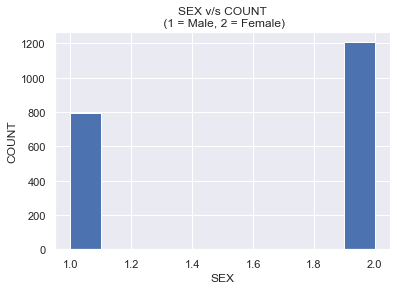

In [14]:
fig = plt.figure()
df['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT\n (1 = Male, 2 = Female)')
fig.show()

Number of Male credit holder is less than Female

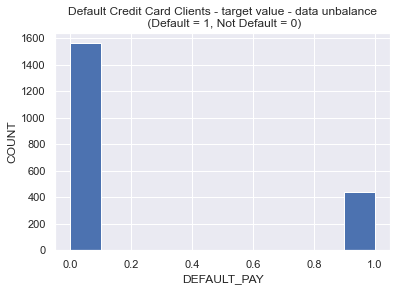

In [15]:
fig = plt.figure()
df['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 1, Not Default = 0)')
fig.show()

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

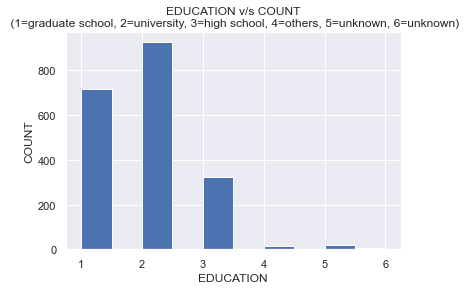

In [16]:
fig = plt.figure()
df['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT\n (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')
fig.show()

More number of credit holders are university students followed by Graduates and then High school students

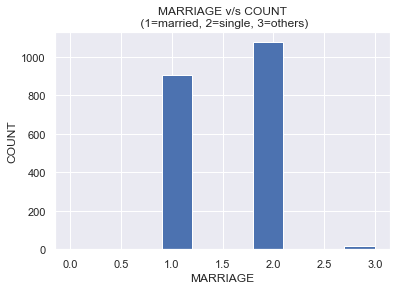

In [17]:
fig = plt.figure()
df['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT\n (1=married, 2=single, 3=others)')
fig.show()

More number of credit cards holder are Married

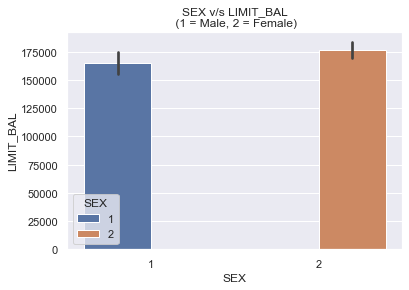

In [18]:
fig = plt.figure()
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')
plt.title('SEX v/s LIMIT_BAL\n (1 = Male, 2 = Female)')
plt.show()

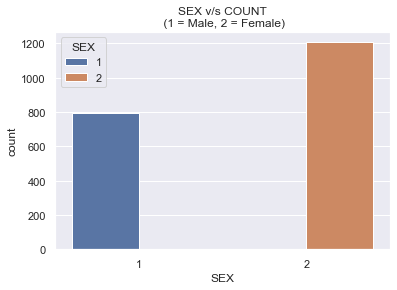

In [19]:
fig = plt.figure()
sns.countplot(x='SEX',data=df,hue = 'SEX')
plt.title('SEX v/s COUNT\n (1 = Male, 2 = Female)')
plt.show()

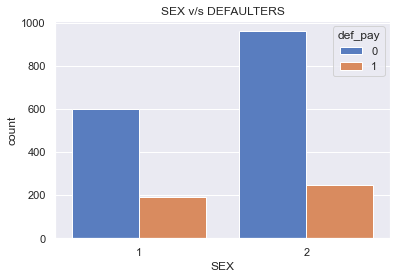

In [20]:
fig = plt.figure()
sns.countplot(x='SEX', data=df,hue="def_pay", palette="muted")
plt.title('SEX v/s DEFAULTERS')
plt.show()

It is evident from the above output that females have overall less default payments wrt males. Non-Defaults have a higher proportion of Females (Sex=2)

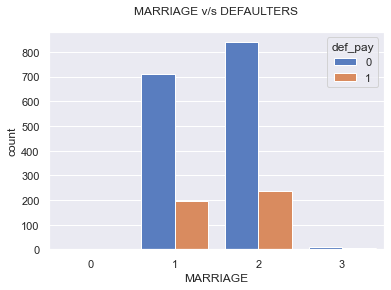

In [21]:
fig = plt.figure()
sns.countplot(x="MARRIAGE", data=df,hue="def_pay", palette="muted")
plt.title('MARRIAGE v/s DEFAULTERS\n')
fig.show()

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people

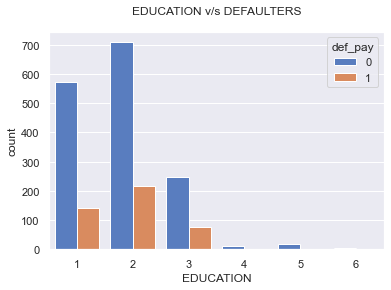

In [22]:
fig = plt.figure()
sns.countplot(x="EDUCATION", data=df,hue="def_pay", palette="muted")
plt.title('EDUCATION v/s DEFAULTERS\n')
fig.show()

From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

In [23]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

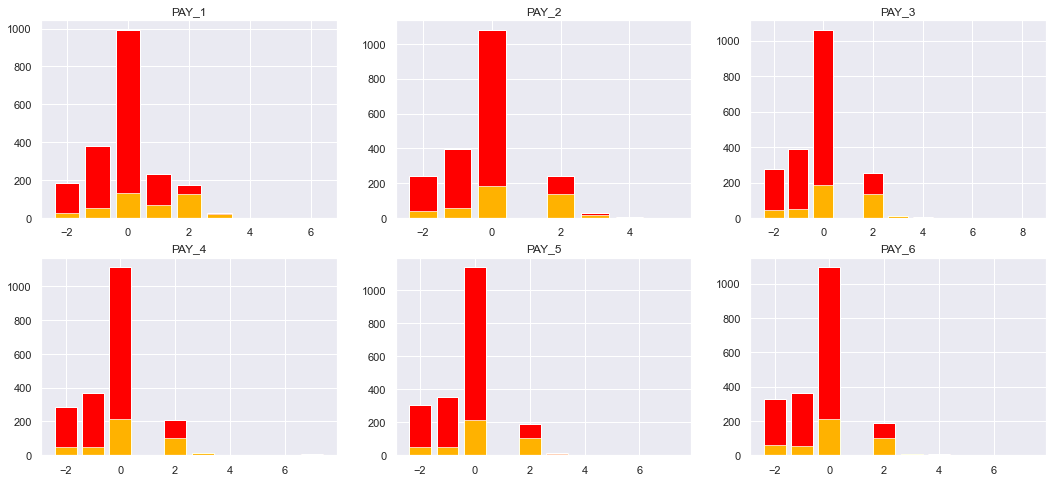

In [24]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

    
plt.show()


The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

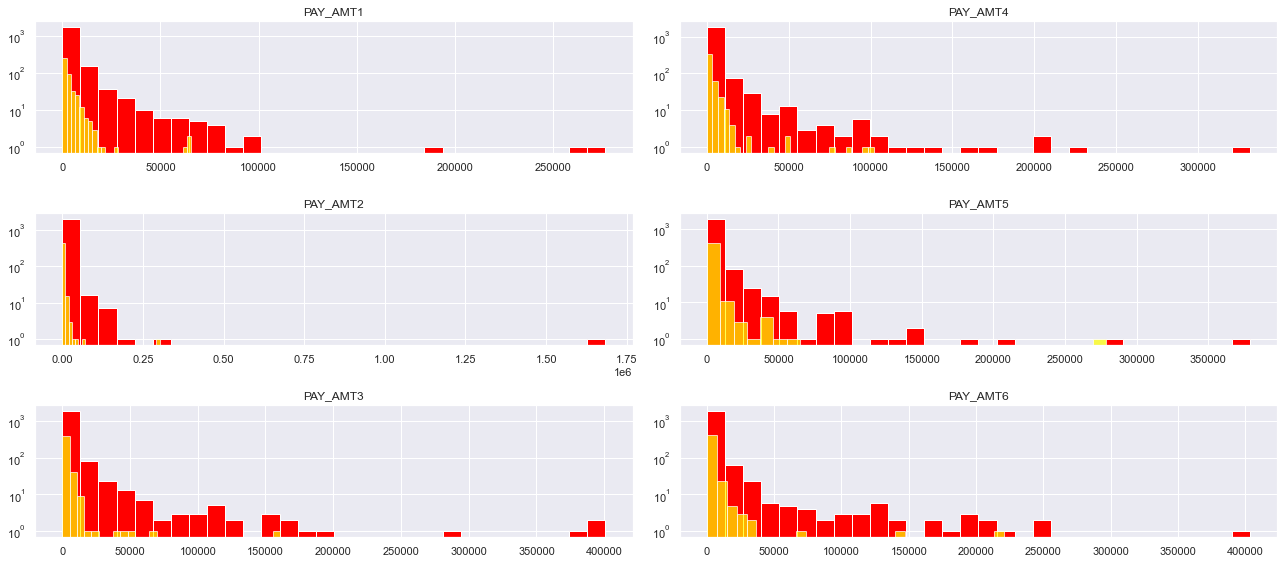

In [25]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)

for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    ax[row,col].set_yscale('log', nonposy='clip')
    
plt.tight_layout()
plt.show()

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

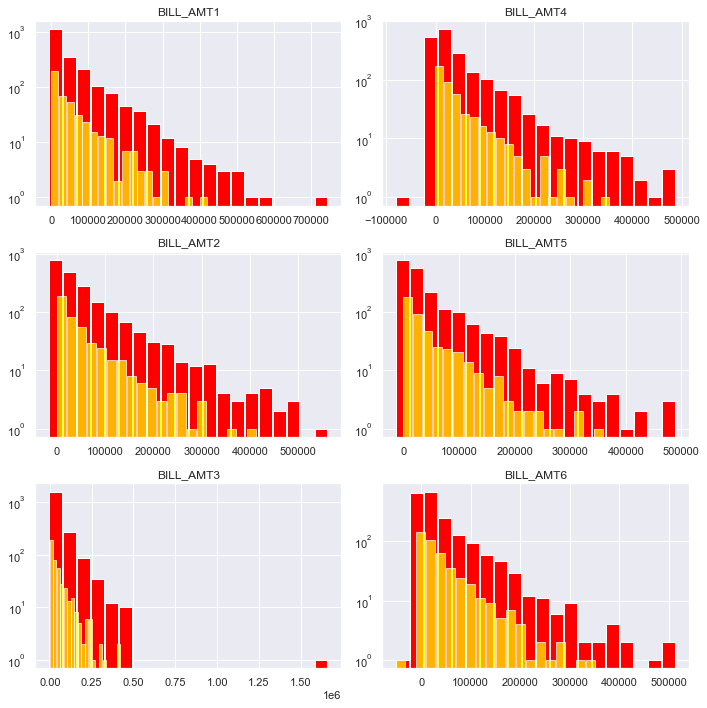

In [26]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])

    ax[row,col].set_yscale('log', nonposy='clip')
    
plt.tight_layout()
plt.show()

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

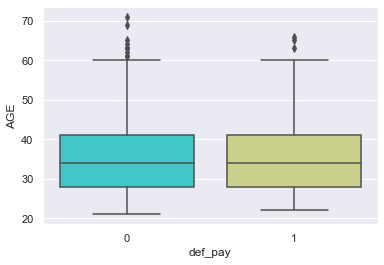

In [27]:
fig = plt.figure()
sns.boxplot(x='def_pay',y='AGE',data=df,palette='rainbow')
fig.show()

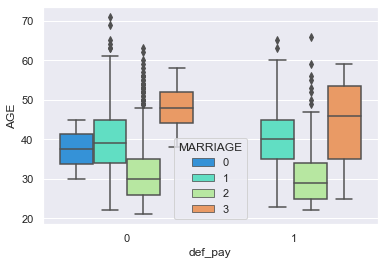

In [28]:
fig = plt.figure()
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")
fig.show()

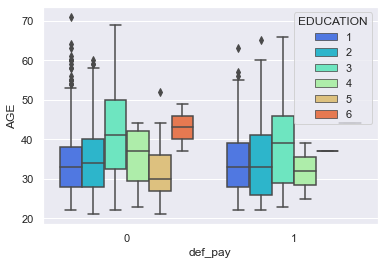

In [29]:
fig = plt.figure()
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=df,palette="rainbow" )
fig.show()

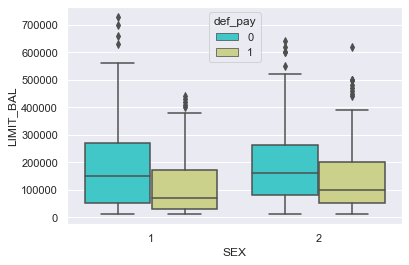

In [30]:
fig = plt.figure()
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")
fig.show()

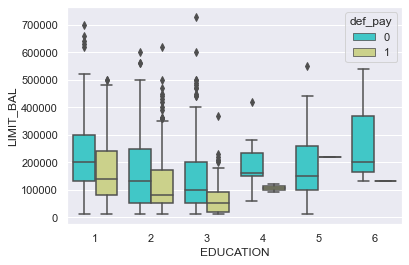

In [31]:
fig = plt.figure()
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")
fig.show()

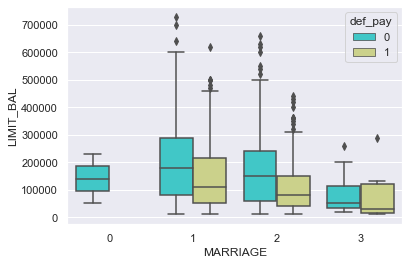

In [32]:
fig = plt.figure()
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")
fig.show()

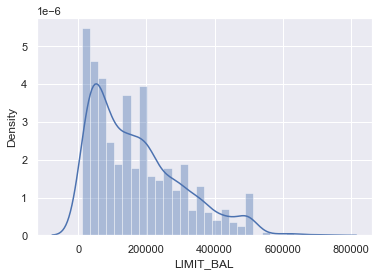

In [33]:
fig = plt.figure()
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)
fig.show()

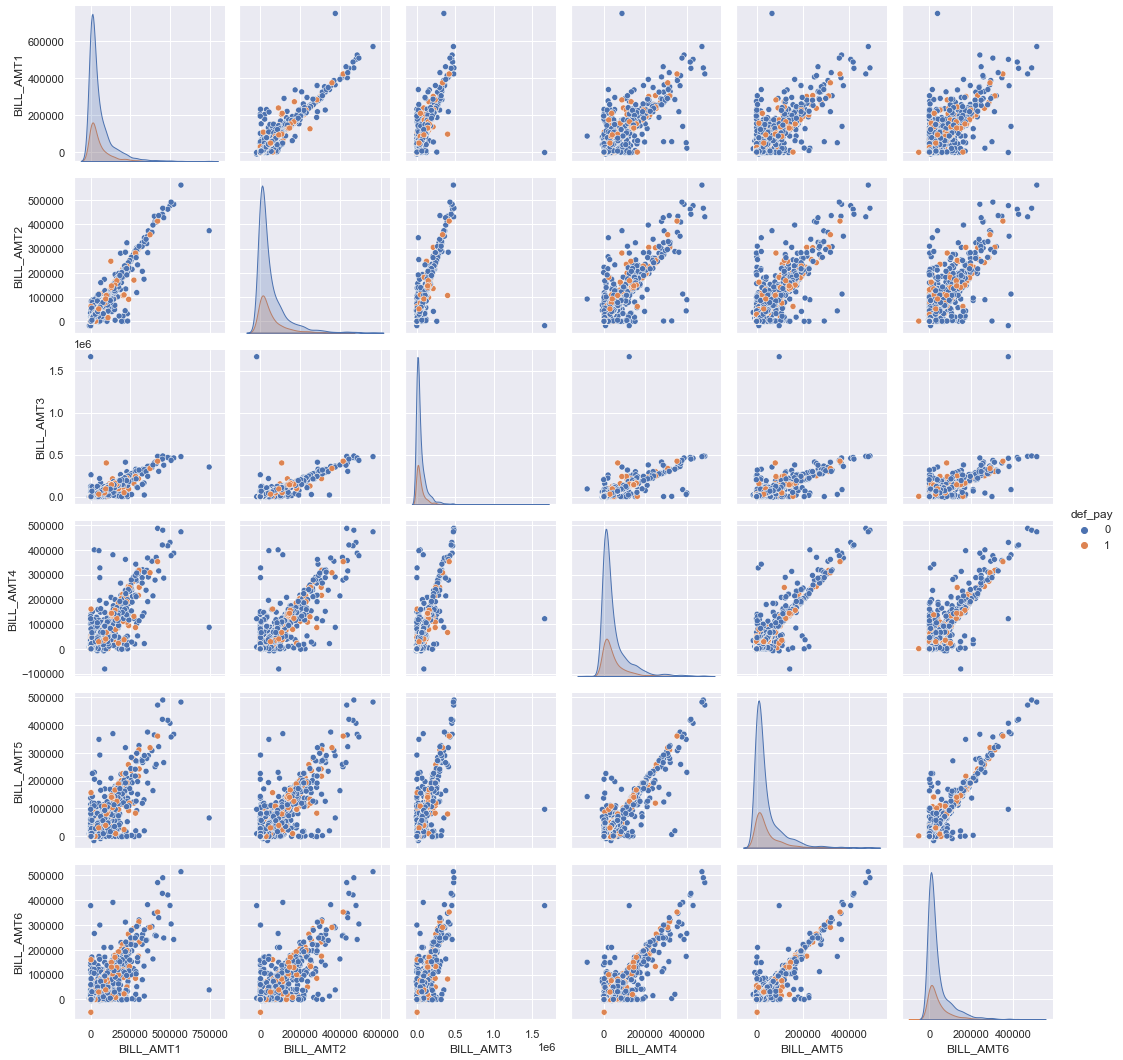

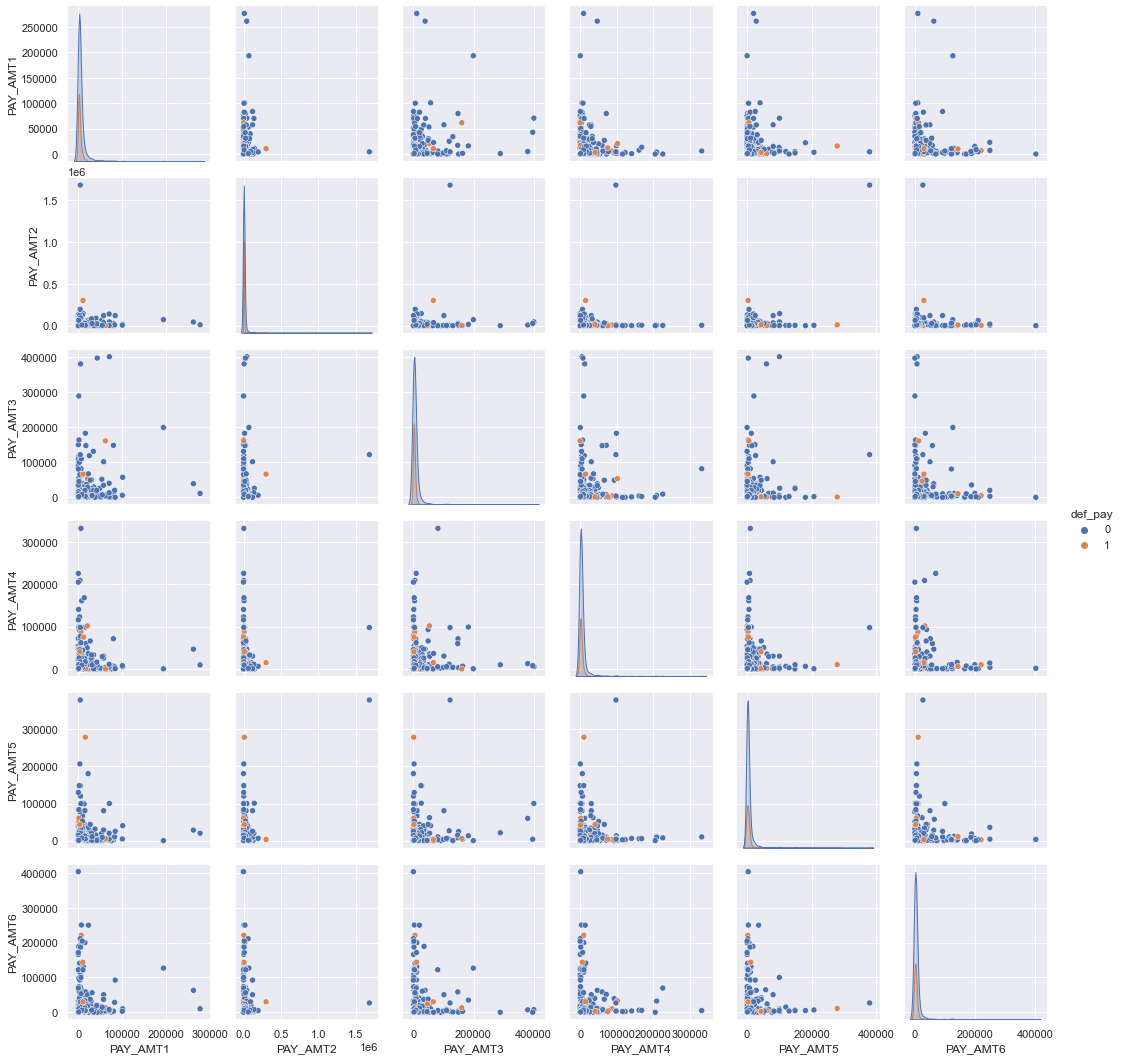

In [34]:
# plot columns with similar names to check the correlation

sns.pairplot(df, vars=df.columns[11:17], kind='scatter', hue= 'def_pay')
sns.pairplot(df, vars=df.columns[17:23], hue = 'def_pay')

In [35]:
correlation = df.corr()

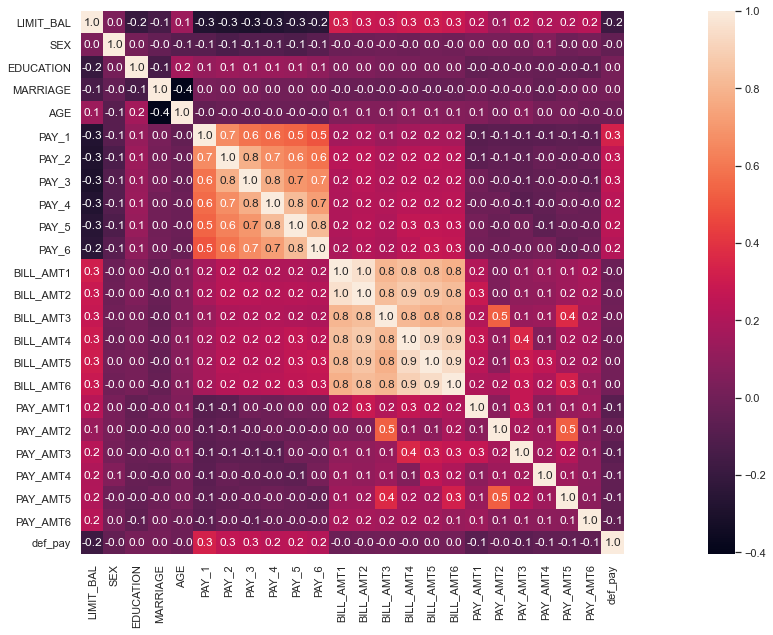

In [36]:
plt.subplots(figsize=(30,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )
plt.show()

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

<AxesSubplot:title={'center':'Correlation with Default'}>

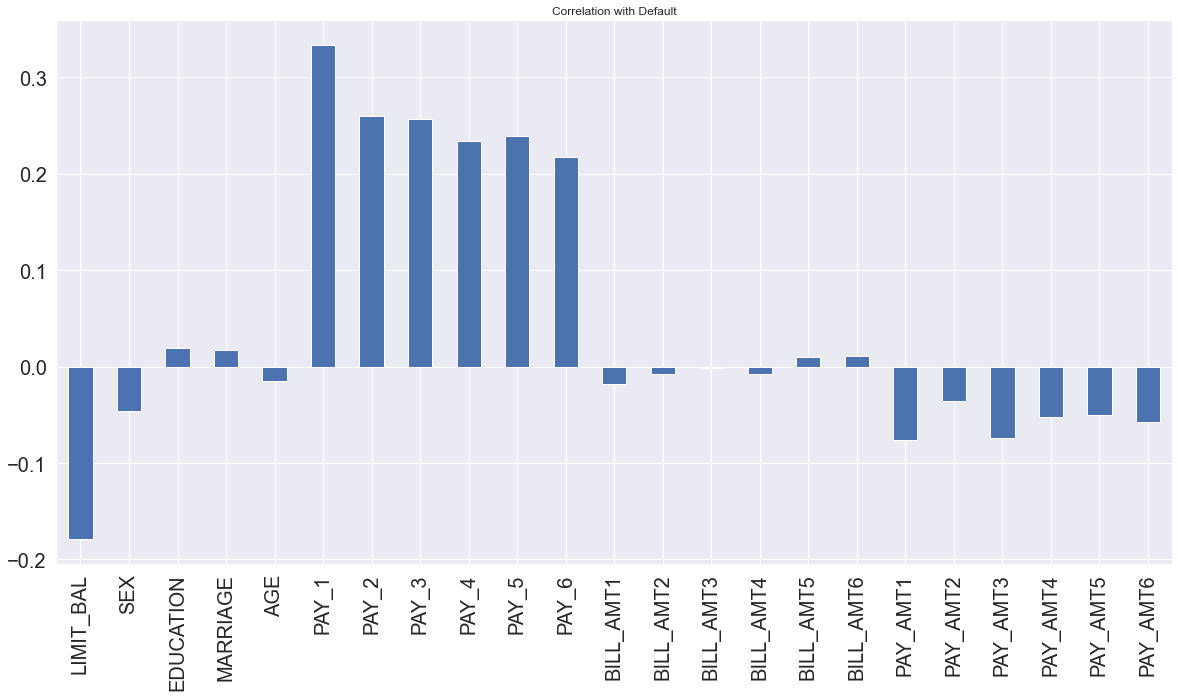

In [37]:
X = df.drop(['def_pay'],axis=1)
X.corrwith(df['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

<Figure size 432x288 with 0 Axes>

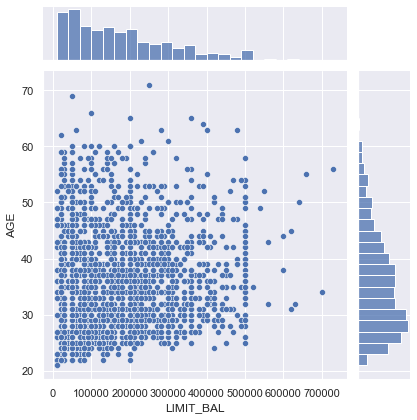

In [38]:
fig = plt.figure()
sns.jointplot(x='LIMIT_BAL',y='AGE',data=df,kind="scatter")
fig.show()

#### Facet Grid

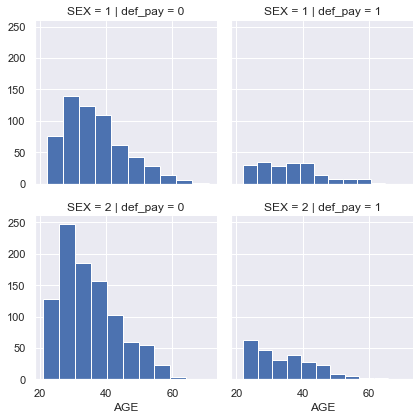

In [39]:
g = sns.FacetGrid(df, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years

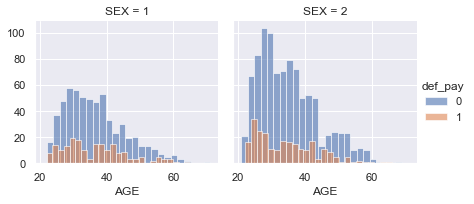

In [40]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years

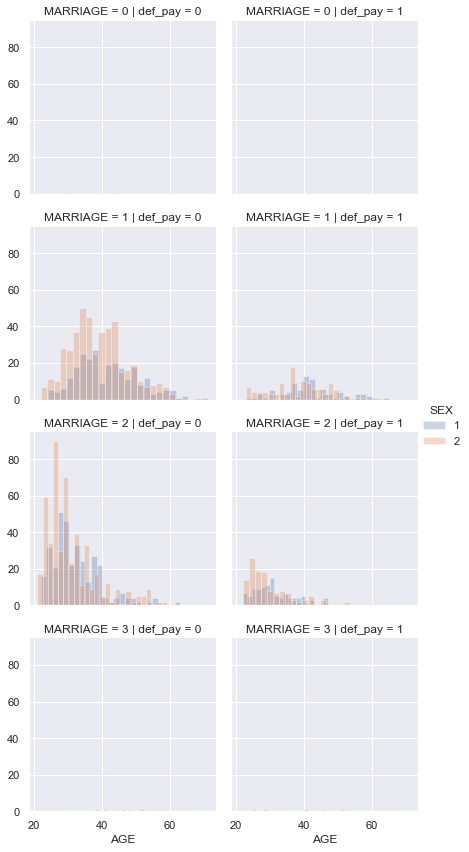

In [41]:
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

### Data Cleaning

In [42]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [43]:
df['EDUCATION'].value_counts(dropna = False)

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [44]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    1076
1     904
3      20
Name: MARRIAGE, dtype: int64

In [45]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [46]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000,2,1,2,25,-1,0,-1,-1,0,...,2199,10856,0,1000,11426,2199,10000,0,9867,0
15149,250000,1,1,1,53,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
18667,50000,2,1,2,23,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3416,200000,2,2,1,37,0,0,0,0,0,...,191730,171269,151550,8017,8000,8000,9000,7000,6000,0
18715,420000,2,1,2,28,0,0,-1,0,0,...,65592,57438,31029,1010,64513,2420,1473,1062,1022,0


In [47]:
fil = (df.PAY_1 == -1) | (df.PAY_1==-2)
df.loc[fil,'PAY_1']=0
df.PAY_1.value_counts()

fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0
df.PAY_2.value_counts()

fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0
df.PAY_3.value_counts()

fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0
df.PAY_4.value_counts()

fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0
df.PAY_5.value_counts()

fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0
df.PAY_6.value_counts()

0    1788
2     190
3      10
4       5
7       3
6       2
5       2
Name: PAY_6, dtype: int64

In [48]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [49]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000,2,1,2,25,0,0,0,0,0,...,2199,10856,0,1000,11426,2199,10000,0,9867,0
15149,250000,1,1,1,53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18667,50000,2,1,2,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3416,200000,2,2,1,37,0,0,0,0,0,...,191730,171269,151550,8017,8000,8000,9000,7000,6000,0
18715,420000,2,1,2,28,0,0,0,0,0,...,65592,57438,31029,1010,64513,2420,1473,1062,1022,0


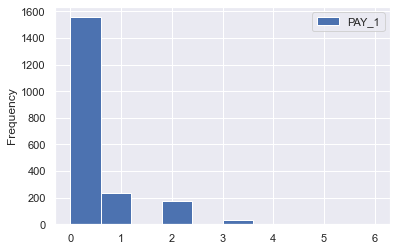

In [50]:
df.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [51]:
df['PAY_1'].describe()

count    2000.000000
mean        0.349000
std         0.734485
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: PAY_1, dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10748 to 18715
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  2000 non-null   int64
 1   SEX        2000 non-null   int64
 2   EDUCATION  2000 non-null   int64
 3   MARRIAGE   2000 non-null   int64
 4   AGE        2000 non-null   int64
 5   PAY_1      2000 non-null   int64
 6   PAY_2      2000 non-null   int64
 7   PAY_3      2000 non-null   int64
 8   PAY_4      2000 non-null   int64
 9   PAY_5      2000 non-null   int64
 10  PAY_6      2000 non-null   int64
 11  BILL_AMT1  2000 non-null   int64
 12  BILL_AMT2  2000 non-null   int64
 13  BILL_AMT3  2000 non-null   int64
 14  BILL_AMT4  2000 non-null   int64
 15  BILL_AMT5  2000 non-null   int64
 16  BILL_AMT6  2000 non-null   int64
 17  PAY_AMT1   2000 non-null   int64
 18  PAY_AMT2   2000 non-null   int64
 19  PAY_AMT3   2000 non-null   int64
 20  PAY_AMT4   2000 non-null   int64
 21  PAY_AMT5 

In [53]:
df.SEX.nunique()

2

In [54]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500
std,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000
50%,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000
75%,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000
max,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000


In [55]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,53341.091500,50172.804500,4.823936e+04,44390.095500,41502.586000,39643.917000
std,76676.065104,72959.306173,7.850584e+04,65827.281839,61928.132672,60472.016246
min,-8187.000000,-18088.000000,-9.032000e+03,-81334.000000,-15306.000000,-51443.000000
25%,3974.750000,3057.750000,3.048500e+03,2939.500000,2158.750000,1319.250000
50%,23410.000000,21378.500000,2.046300e+04,19454.000000,18652.000000,17621.500000
75%,70972.500000,65359.500000,6.056850e+04,53394.250000,51005.500000,49484.750000
max,746814.000000,562316.000000,1.664089e+06,487066.000000,489200.000000,513798.000000


In [56]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

### One Hot Encoding for Categorical Variables

In [57]:
df.shape

(2000, 24)

In [58]:
df.columns = df.columns.map(str.lower)

In [59]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


### Feature Scaling of Numerical Attributes

In [60]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']

df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [61]:
df.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.050233,1,3,1,-0.378229,0,0,0,0,0,...,0.607543,0.262893,-0.421472,0.240538,-0.009029,-0.095826,-0.129128,-0.245872,-0.175478,0
12574,-1.229991,2,3,1,1.481197,0,0,0,0,2,...,-0.648831,-0.651960,-0.640356,-0.394515,-0.158517,-0.149403,-0.314384,-0.295614,-0.269353,1
29677,-0.925961,1,2,1,-0.815741,0,0,0,0,0,...,0.024083,-0.649344,0.071838,-0.394515,0.993958,-0.178111,-0.234107,2.368160,-0.204297,0
8857,-0.697939,2,3,1,1.809331,2,2,3,3,3,...,-0.055342,-0.027241,0.015930,-0.111248,-0.118654,-0.205540,-0.314384,-0.209386,-0.194253,1
21099,0.746203,1,1,2,-0.159473,1,2,0,0,2,...,-0.333412,-0.420150,-0.368873,-0.394515,-0.058859,-0.187254,-0.314384,-0.185062,-0.175478,0
17459,-0.241894,2,3,1,-0.596985,0,0,0,0,2,...,0.574934,0.379525,0.350731,-0.034690,-0.046277,0.311302,-0.314384,-0.172292,-0.161397,0
1477,0.214151,1,2,2,-1.034497,0,0,0,0,0,...,-0.431131,-0.466618,-0.546570,0.597455,-0.061749,-0.049655,-0.271158,-0.284790,-0.188949,0
5121,-0.165886,1,2,2,0.168661,0,0,0,0,0,...,0.312288,0.327888,0.319948,-0.203118,-0.096230,-0.105883,-0.178530,-0.185062,-0.175478,0
18339,-1.153983,2,2,2,-1.472009,0,0,0,0,0,...,-0.375077,-0.350245,-0.324825,-0.164839,-0.083748,-0.141540,-0.190880,-0.245750,-0.232601,0


In [62]:
df.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
18551,-0.165886,2,1,2,-1.253253,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
16366,0.974226,2,1,2,-0.050095,0,0,0,0,0,...,-0.661002,-0.655982,-0.643515,-0.368179,-0.136318,-0.238042,-0.259487,-0.261743,-0.184537,0
12273,1.050233,2,1,2,-0.706363,0,0,0,0,0,...,-0.114983,-0.040631,-0.121407,-0.241398,-0.118155,-0.217791,-0.143208,-0.215467,-0.198947,0
19325,-0.089879,2,3,1,0.278039,0,0,0,0,0,...,-0.671365,-0.666998,-0.652315,-0.378667,-0.153360,-0.269219,-0.301602,-0.294094,-0.259637,0
553,-0.925961,1,1,1,2.246843,0,0,0,0,0,...,-0.236254,-0.179343,-0.159898,-0.203118,-0.121145,-0.228397,-0.190880,-0.215467,-0.221617,1
23296,-0.089879,2,1,2,-1.143875,0,0,0,0,0,...,-0.641097,-0.494997,-0.655739,-0.317956,0.126157,-0.178157,0.303136,-0.306682,0.193778,0
15149,0.594188,1,1,1,1.918709,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
18667,-0.925961,2,1,2,-1.362631,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,0
3416,0.214151,2,2,1,0.168661,0,0,0,0,0,...,2.238840,2.095960,1.851006,0.219255,0.040800,0.087030,0.241384,0.118987,0.012272,0


### Spiliting Dataset into training(70%) and test set(30%)

In [63]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [64]:
X_train.shape

(1400, 23)

In [65]:
X_test.shape

(600, 23)

### Applying Machine Learning Algorithm for Classification Problem

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [67]:
y_pred = logmodel.predict(X_test)

In [68]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.826667,0.694915,0.322835,0.44086,0.64239


### Stochastic Gradient Descent

In [69]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [70]:
y_pred = sgd.predict(X_test)

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.816667,0.666667,0.267717,0.382022,0.615888


### K-Nearest Neighbour

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

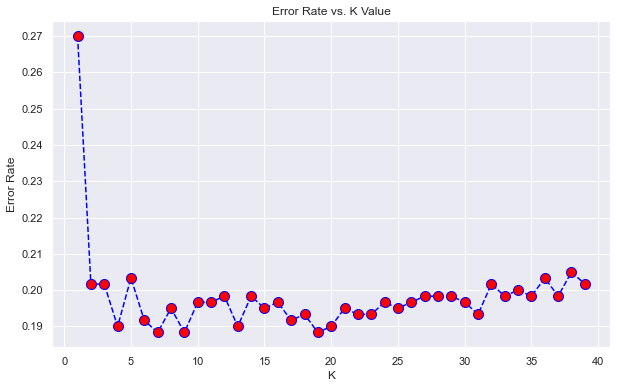

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [75]:
y_pred = knn.predict(X_test)

In [76]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.811667,0.645833,0.244094,0.354286,0.604077


### Support Vector Machine

In [77]:
from sklearn.svm import SVC

scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [78]:
y_pred = scv.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

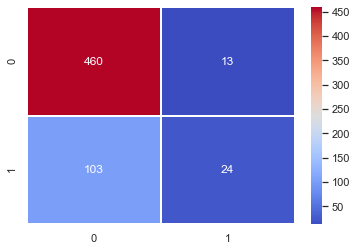

In [80]:
fig = plt.figure()
sns.heatmap(cm,annot= True, linewidths=1,cmap='coolwarm', fmt='.0f')
fig.show()

In [81]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.806667,0.648649,0.188976,0.292683,0.580746


### Gaussian Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [83]:
y_pred = naive_bayes.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

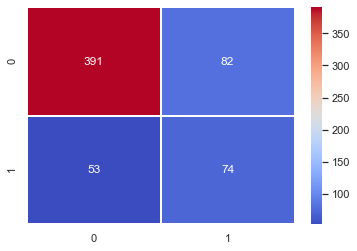

In [85]:
fig = plt.figure()
sns.heatmap(cm,annot= True, linewidths=1,cmap='coolwarm', fmt='.0f')
fig.show()

In [86]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.775,0.474359,0.582677,0.522968,0.704658


### Decision Tree Classification

In [87]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [88]:
y_pred = dct.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

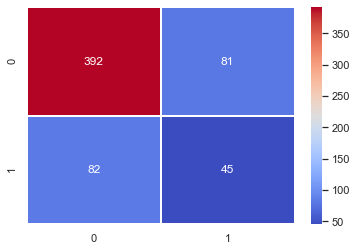

In [90]:
fig = plt.figure()
sns.heatmap(cm,annot= True, linewidths=1,cmap='coolwarm', fmt='.0f')
fig.show()

In [91]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.728333,0.357143,0.354331,0.355731,0.591542


### Random Forest Classification

In [92]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [93]:
y_pred = rfc.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

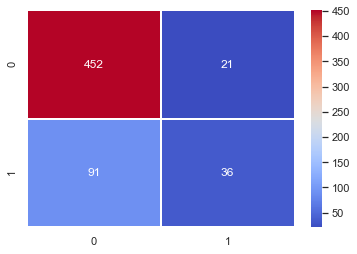

In [95]:
fig = plt.figure()
sns.heatmap(cm,annot= True, linewidths=1,cmap='coolwarm', fmt='.0f')
fig.show()

In [96]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.813333,0.631579,0.283465,0.391304,0.619534


### XGBOOST Classifier

In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[17:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
y_pred =xgb.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

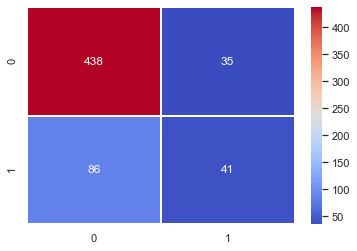

In [100]:
fig = plt.figure()
sns.heatmap(cm,annot= True, linewidths=1,cmap='coolwarm', fmt='.0f')
fig.show()

In [101]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.798333,0.539474,0.322835,0.403941,0.624419


### Model Optimization using Grid Search and K-Fold Cross validation

### Grid Search on Logistic Regression Model

In [102]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

In [103]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [104]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [105]:
grid_search_log = grid_search_log.fit(X_train,y_train)

In [106]:
best_accuracy = grid_search_log.best_score_

In [107]:
print('Accuracy on Cross Validation set :', best_accuracy)

Accuracy on Cross Validation set : 0.82


In [108]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [109]:
y_pred_log = grid_search_log.predict(X_test)

In [110]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [111]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333


### Grid Search on Stochastic Gradient Descent

In [112]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}

grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [113]:
best_accuracy_1 = grid_search_sgd.best_score_

print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8150000000000001


In [114]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [115]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [116]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [117]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815,0.637931,0.291339,0.400000,0.623471


### Grid Search on SVM Model

In [118]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]

In [119]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [120]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8114285714285716


In [121]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 0.01, 'kernel': 'linear'}

In [122]:
y_pred_svc = grid_search_1.predict(X_test)

In [123]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

model =  pd.DataFrame([['SVC Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC Model Tuned,0.808333,0.642857,0.212598,0.319527,0.590443


### Grid Search on KNN Classifier

In [124]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [125]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [126]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8107142857142857


In [127]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 24, 'weights': 'uniform'}

In [128]:
y_pred_KNN = grid_search.predict(X_test)

In [129]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC Model Tuned,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


### Grid Search on Decision Tree 

In [130]:
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [131]:
best_accuracy_1 = grid_search_dt.best_score_

In [132]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8242857142857142


In [133]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [134]:
y_pred_dct = grid_search_dt.predict(X_test)

In [135]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC Model Tuned,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567


### Grid Search on Random Forest Classifier

In [136]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}

grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [137]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.822857142857143


In [138]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'gini', 'n_estimators': 600}

In [139]:
y_pred_rf = grid_search_rf.predict(X_test)

In [140]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC Model Tuned,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350


### Grid Search on XGBOOST Classifier

In [141]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

[17:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [142]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8142857142857143


In [143]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}

In [144]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [145]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,SVC Model Tuned,0.808333,0.642857,0.212598,0.319527,0.590443
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872
4,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
5,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350
6,XGBOOST Tuned,0.800000,0.553846,0.283465,0.375000,0.611077


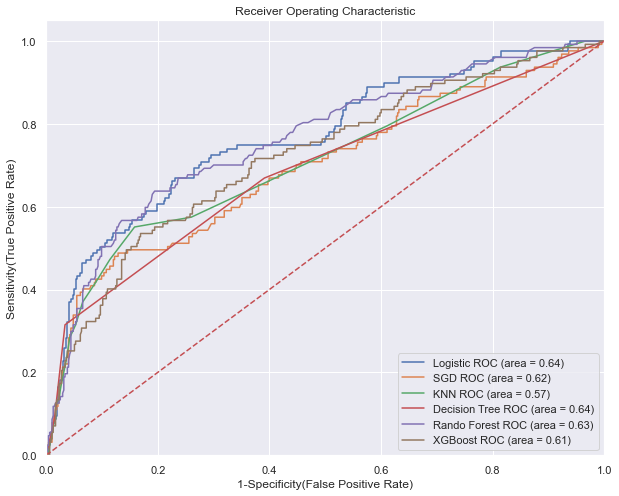

In [146]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion

1) Using a Logistic Regression classifier, we can predict with 82.5% accuracy, whether a customer is likely to default next month.

2) Using a Stochastic Gradient Descent classifier, we can predict with 81.5% accuracy, whether a customer is likely to default next month.

3) Using a Support Vector Machine classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

4) Using a K-Nearest Neighbour classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

5) Using a Decision Tree classifier, we can predict with 82.83% accuracy, whether a customer is likely to default next month.

6) Using a Random Forest classifier, we can predict with 81% accuracy, whether a customer is likely to default next month.

7) Using a XGBOOST classifier, we can predict with 80% accuracy, whether a customer is likely to default next month.

#### The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

#### We found that using Decision Tree or Logistic regression algorithm is better for creating our machine learning model.

#### Demographics: we see that being Female, More educated, Single and between 30-40 years old means a customer is more likely to make payments on time.